In [4]:
import zipfile as zip
with zip.ZipFile("archive.zip", "r") as z:
    z.extractall()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

2025-12-28 13:21:15.308950: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
df = pd.read_csv("kidney_dataset.csv")

In [7]:
df.head()
df.info()
df.describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Creatinine        5000 non-null   float64
 1   BUN               5000 non-null   float64
 2   GFR               5000 non-null   float64
 3   Urine_Output      5000 non-null   float64
 4   Diabetes          5000 non-null   int64  
 5   Hypertension      5000 non-null   int64  
 6   Age               5000 non-null   float64
 7   Protein_in_Urine  5000 non-null   float64
 8   Water_Intake      5000 non-null   float64
 9   Medication        2013 non-null   object 
 10  CKD_Status        5000 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 429.8+ KB


<bound method NDFrame.describe of       Creatinine        BUN         GFR  Urine_Output  Diabetes  Hypertension  \
0       0.788803   8.386869  102.161787   1632.649387         0             0   
1       3.413970  53.688796   50.071257    935.540516         1             0   
2       0.647645   7.466540   89.451831   1774.553846         1             1   
3       0.795508  12.516821   99.872180   2360.602980         0             0   
4       0.869010  19.855960   86.110182   1987.750901         0             1   
...          ...        ...         ...           ...       ...           ...   
4995    4.048737  53.094020   24.964596   1179.120228         1             1   
4996    0.787392   7.598859   94.228637   2029.623102         0             1   
4997    1.177967  10.198228   89.099101   2463.843638         0             1   
4998    1.189794  12.446732   90.539937   1851.314122         1             0   
4999    1.000078  11.804883   91.697611   2056.462819         0            

In [8]:
df.shape

(5000, 11)

In [9]:
(df.isna().mean() * 100).sort_values(ascending=False)

Medication          59.74
BUN                  0.00
Creatinine           0.00
GFR                  0.00
Urine_Output         0.00
Hypertension         0.00
Diabetes             0.00
Age                  0.00
Protein_in_Urine     0.00
Water_Intake         0.00
CKD_Status           0.00
dtype: float64

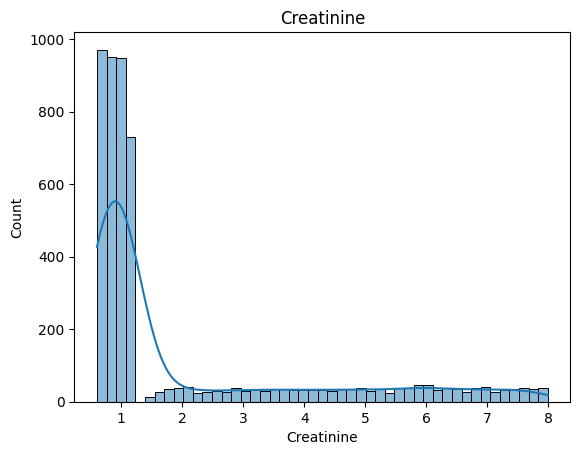

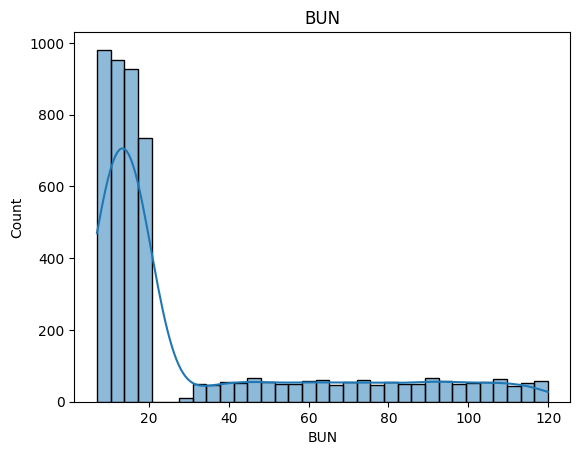

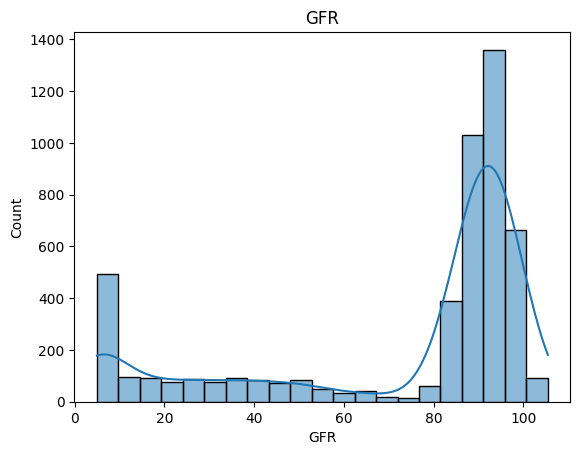

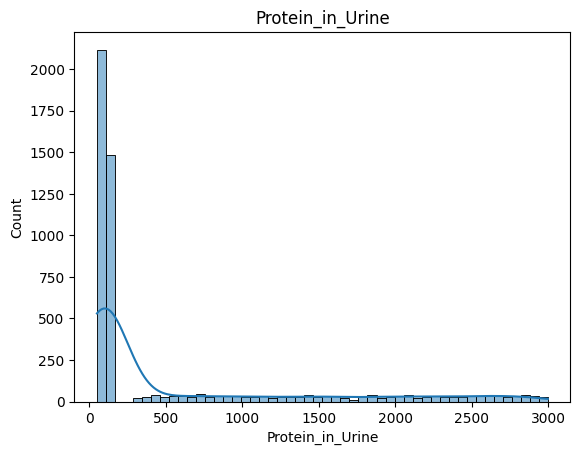

In [10]:
features = ["Creatinine", "BUN", "GFR", "Protein_in_Urine"]


for col in features:
    sns.histplot(df[col], kde=True) 
    plt.title(col)
    plt.show()

/tmp/ipykernel_5928/3123877168.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ckd_counts.index, y=ckd_counts.values, ax=axes[0, 1], palette='pastel')


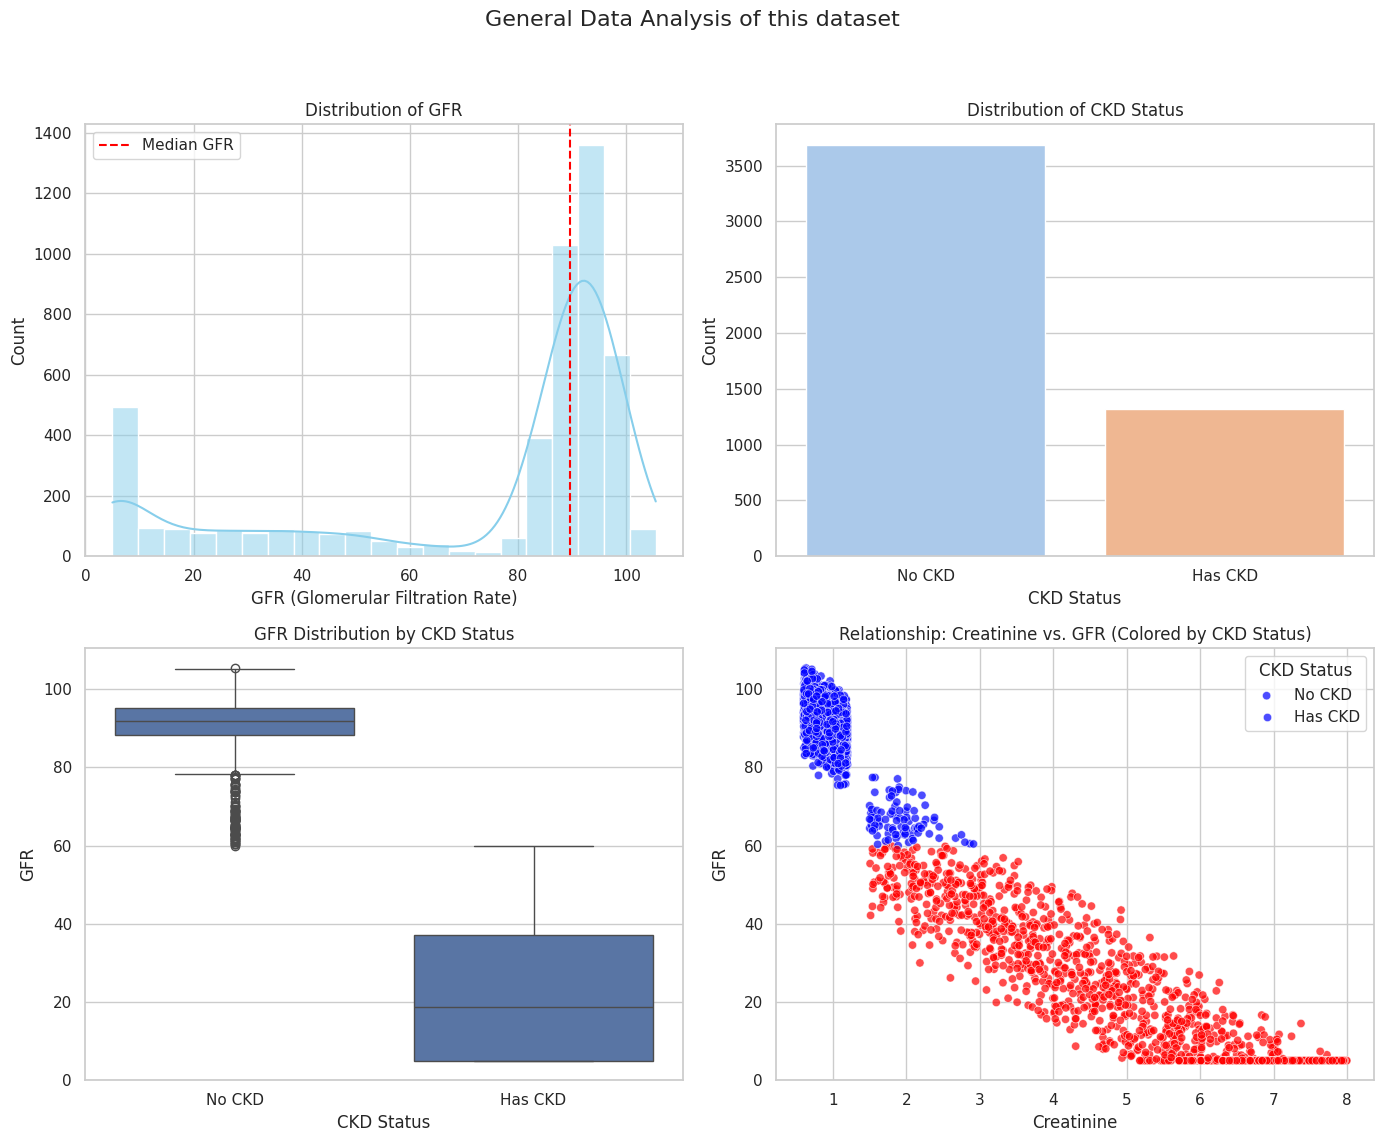


--- Corrected EDA Visualization Output: eda_summary_plots_corrected.png ---


In [11]:
sns.set_theme(style="whitegrid")



fig, axes = plt.subplots(2, 2, figsize =(14,12))
fig.suptitle("General Data Analysis of this dataset", fontsize =16)


sns.histplot(df['GFR'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of GFR')
axes[0, 0].set_xlabel('GFR (Glomerular Filtration Rate)')
axes[0, 0].axvline(df['GFR'].median(), color='red', linestyle='--', label='Median GFR')
axes[0, 0].legend()



ckd_counts = df['CKD_Status'].map({0: 'No CKD', 1: 'Has CKD'}).value_counts()
sns.barplot(x=ckd_counts.index, y=ckd_counts.values, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Distribution of CKD Status')
axes[0, 1].set_xlabel('CKD Status')
axes[0, 1].set_ylabel('Count')



sns.boxplot(x='CKD_Status', y='GFR', data=df.replace({'CKD_Status': {0: 'No CKD', 1: 'Has CKD'}}), ax=axes[1, 0])
axes[1, 0].set_title('GFR Distribution by CKD Status')
axes[1, 0].set_xlabel('CKD Status')
axes[1, 0].set_ylabel('GFR')


sns.scatterplot(x='Creatinine', y='GFR', hue='CKD_Status', data=df, ax=axes[1, 1], palette={0: 'blue', 1: 'red'}, alpha=0.7)
axes[1, 1].set_title('Relationship: Creatinine vs. GFR (Colored by CKD Status)')
axes[1, 1].set_xlabel('Creatinine')
axes[1, 1].set_ylabel('GFR')
axes[1, 1].legend(title='CKD Status', labels=['No CKD', 'Has CKD'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show('eda_summary_plots_corrected.png')


print("\n--- Corrected EDA Visualization Output: eda_summary_plots_corrected.png ---")

In [12]:
Y = df['CKD_Status']
X =  df.drop(columns= ['CKD_Status','Medication'])


X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=42,
    stratify= Y

)

/tmp/ipykernel_5928/488841081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medication'].fillna('Unknown', inplace=True)


--- MLP Classifier (Neural Network) Results ---
|     | Accuracy   | F1-Score   | ROC-AUC   |
|:----|:-----------|:-----------|:----------|
| MLP | 0.996      | 0.9925     | 1         |

--- Top 10 Feature Importance from Random Forest Model ---
| Feature               | Importance   |
|:----------------------|:-------------|
| num__GFR              | 0.292644     |
| num__Creatinine       | 0.191219     |
| num__BUN              | 0.190454     |
| num__Protein_in_Urine | 0.175043     |
| num__Urine_Output     | 0.145804     |
| num__Age              | 0.00171735   |
| num__Water_Intake     | 0.00151711   |
| cat__Hypertension_1   | 0.000377173  |
| cat__Diabetes_0       | 0.000354836  |
| cat__Medication_ARB   | 0.000254652  |


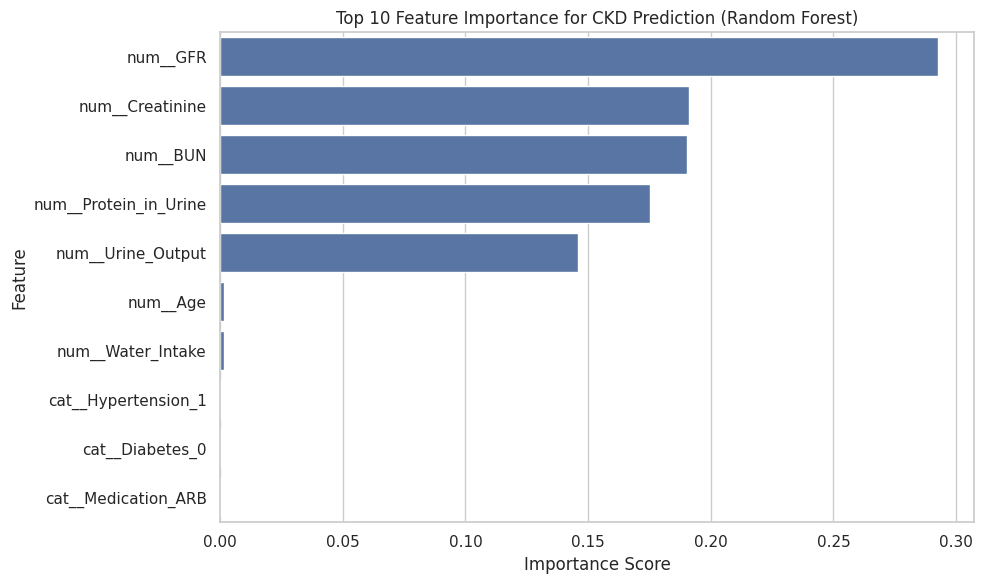


--- Feature Importance Visualization Output: feature_importance.png ---


In [13]:
df['Medication'].fillna('Unknown', inplace=True)
X = df.drop('CKD_Status', axis=1)
Y = df['CKD_Status']
numerical_features = ['Creatinine', 'BUN', 'GFR', 'Urine_Output', 'Age', 'Protein_in_Urine', 'Water_Intake']
categorical_features = ['Diabetes', 'Hypertension', 'Medication'] 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' 
)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)




print("--- MLP Classifier (Neural Network) Results ---")

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('MLP', mlp_classifier)])
mlp_pipeline.fit(X_train, Y_train)
Y_pred_mlp = mlp_pipeline.predict(X_test)
Y_proba_mlp = mlp_pipeline.predict_proba(X_test)[:, 1]

mlp_results = {
    'Accuracy': accuracy_score(Y_test, Y_pred_mlp),
    'F1-Score': f1_score(Y_test, Y_pred_mlp),
    'ROC-AUC': roc_auc_score(Y_test, Y_proba_mlp)
}

mlp_results_df = pd.DataFrame(mlp_results, index=['MLP']).round(4)
print(mlp_results_df.to_markdown(numalign="left", stralign="left"))



rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('RandomForest', RandomForestClassifier(random_state=42))])
rf_pipeline.fit(X_train, Y_train)

feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()


importance_scores = rf_pipeline.named_steps['RandomForest'].feature_importances_


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\n--- Top 10 Feature Importance from Random Forest Model ---")
print(feature_importance_df.head(10).to_markdown(index=False, numalign="left", stralign="left"))


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importance for CKD Prediction (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show('feature_importance')


print("\n--- Feature Importance Visualization Output: feature_importance.png ---")

In [14]:
from scipy.stats import spearmanr, probplot
import statsmodels.api as sm

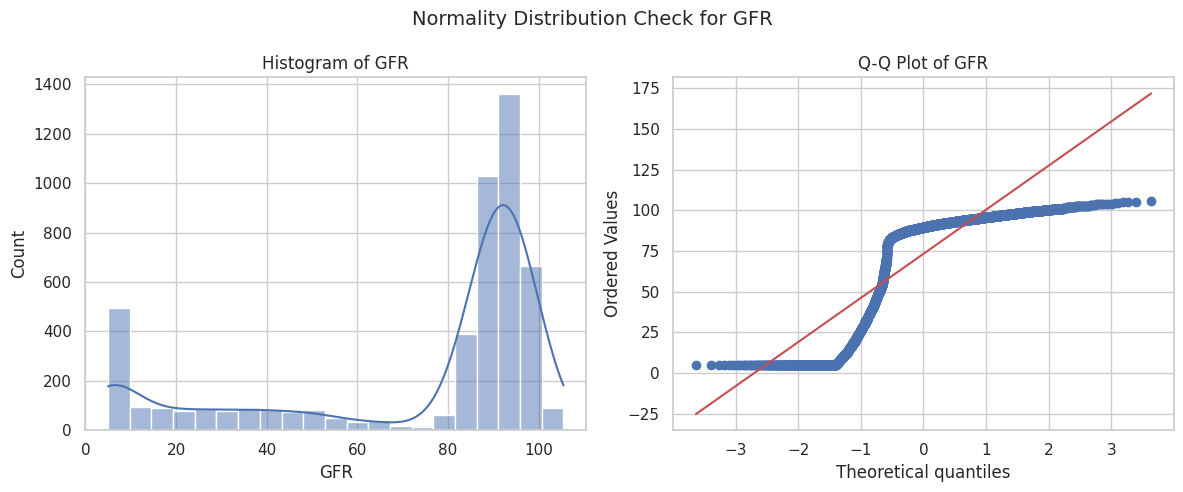


 Spearman's Correlation: Water_Intake vs. Protein_in_Urine 
Spearman's rho (ρ): -0.0025
P-Value: 0.8586004175
Conclusion: No Statistically Significant Association


In [15]:
fig, axes = plt.subplots(1, 2, figsize =(12,5))
fig.suptitle("Normality Distribution Check for GFR", fontsize=14) # Corrected assignment


sns.histplot(df["GFR"], kde=True, ax=axes[0])
axes[0].set_title('Histogram of GFR')
axes[0].set_xlabel('GFR')


probplot(df['GFR'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of GFR')

plt.tight_layout()
plt.show() 

rho, p_spearman = spearmanr(df['Water_Intake'], df['Protein_in_Urine'])

print("\n Spearman's Correlation: Water_Intake vs. Protein_in_Urine ")
print(f"Spearman's rho (ρ): {rho:.4f}")
print(f"P-Value: {p_spearman:.10f}")
print("Conclusion: " + ("Statistically Significant Association (ρ is the effect size)" if p_spearman <= 0.05 else "No Statistically Significant Association"))

In [16]:
from scipy.stats import spearmanr, kruskal
df['Medication'].fillna('Unknown', inplace=True)


fig, ax = plt.subplots(figsize=(6, 6))
sm.qqplot(df['GFR'], line='s', ax=ax)
ax.set_title('Q-Q Plot of GFR')
plt.tight_layout()
plt.savefig('gfr_qqplot.png')
plt.close()
print("--- Normality Check (Visual Q-Q Plot) Output: gfr_qqplot.png ---")


print("\n--- Spearman's Correlation: Water_Intake vs. Protein_in_Urine ---")
rho, p_spearman = spearmanr(df['Water_Intake'], df['Protein_in_Urine'])
print(f"Spearman's Rho: {rho:.4f}")
print(f"P-Value: {p_spearman:.4f}")

if p_spearman < 0.05:
    print("Conclusion: Statistically significant monotonic association exists.")
else:
    print("Conclusion: No statistically significant monotonic association.")



medication_counts = df['Medication'].value_counts()
top_meds = medication_counts[medication_counts > 100].index.tolist() 

gfr_groups = [df[df['Medication'] == med]['GFR'].values for med in top_meds]
group_names = top_meds

print("\n--- Kruskal-Wallis H Test (GFR by Medication Group) ---")
print(f"Groups Tested: {group_names}")


if len(gfr_groups) >= 2: 
    h_stat, p_kruskal = kruskal(*gfr_groups)
    print(f"H-Statistic: {h_stat:.4f}")
    print(f"P-Value: {p_kruskal:.4f}")

    if p_kruskal < 0.05:
        print("Conclusion: Reject H0. The median GFR is significantly different across at least one pair of medication groups.")
   
    else:
        print("Conclusion: Fail to Reject H0. No significant difference in median GFR across the groups.")
else:
    print("Not enough groups for Kruskal-Wallis test.")

--- Normality Check (Visual Q-Q Plot) Output: gfr_qqplot.png ---

--- Spearman's Correlation: Water_Intake vs. Protein_in_Urine ---
Spearman's Rho: -0.0025
P-Value: 0.8586
Conclusion: No statistically significant monotonic association.

--- Kruskal-Wallis H Test (GFR by Medication Group) ---
Groups Tested: ['Unknown', 'ACE Inhibitor', 'ARB', 'Diuretic']
H-Statistic: 3.2223
P-Value: 0.3586
Conclusion: Fail to Reject H0. No significant difference in median GFR across the groups.


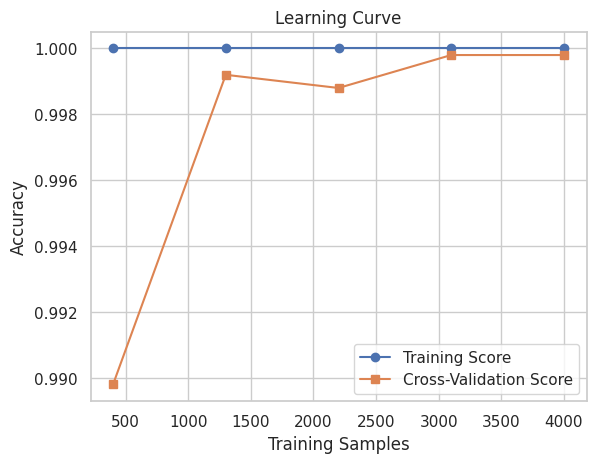

In [17]:

from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 5)
    )
    

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
    plt.plot(train_sizes, test_mean, label='Cross-Validation Score', marker='s')

    plt.title('Learning Curve')
    plt.xlabel('Training Samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()



plot_learning_curve(rf_pipeline, X, Y)

Random Forest Log Loss: 0.0056


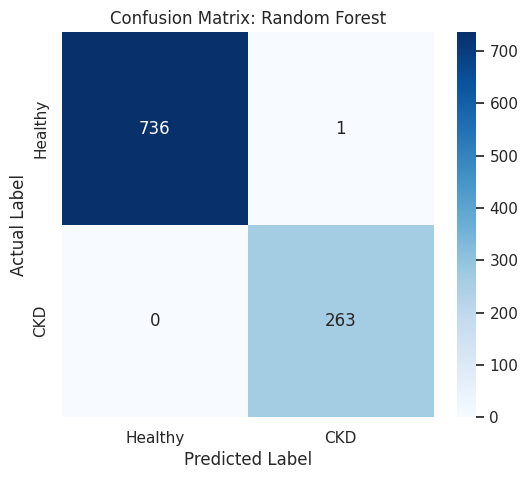

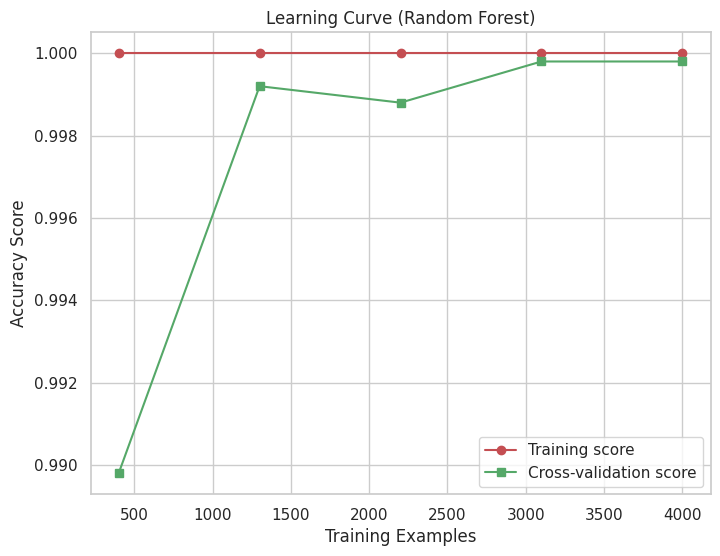

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, log_loss
from sklearn.model_selection import learning_curve


rf_probs = rf_pipeline.predict_proba(X_test)
loss = log_loss(Y_test, rf_probs)
print(f"Random Forest Log Loss: {loss:.4f}")

Y_pred = rf_pipeline.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'CKD'], 
            yticklabels=['Healthy', 'CKD'])
plt.title('Confusion Matrix: Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 's-', color="g", label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_learning_curve(rf_pipeline, "Learning Curve (Random Forest)", X, Y)

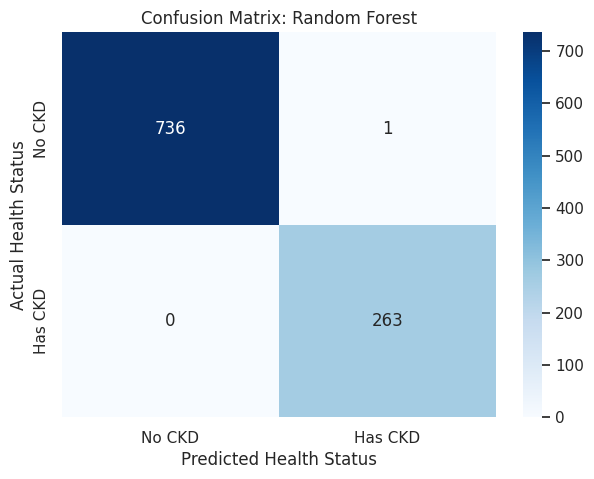

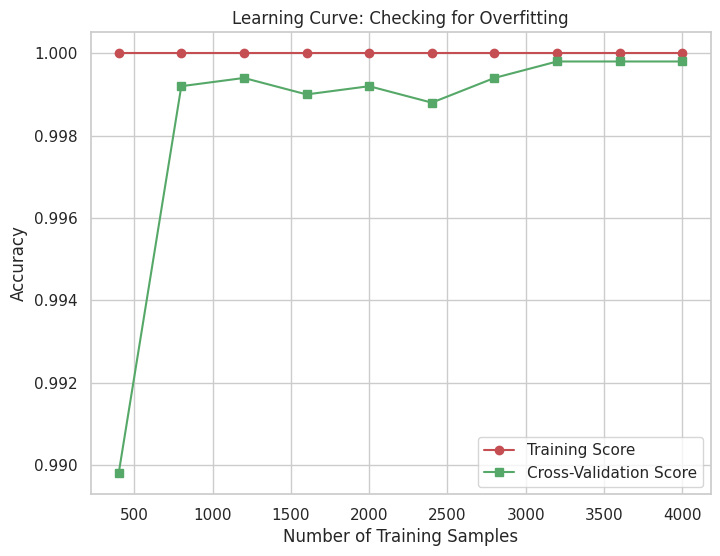


--- Final Medical Classification Report ---
              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00       737
         CKD       1.00      1.00      1.00       263

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [19]:
from sklearn.metrics import confusion_matrix, classification_report 

y_pred = rf_pipeline.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No CKD', 'Has CKD'], 
            yticklabels=['No CKD', 'Has CKD'])
plt.title('Confusion Matrix: Random Forest')
plt.ylabel('Actual Health Status')
plt.xlabel('Predicted Health Status')
plt.show()

train_sizes, train_scores, test_scores = learning_curve(
    rf_pipeline, X, Y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 's-', color="g", label="Cross-Validation Score")
plt.title('Learning Curve: Checking for Overfitting')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid(True)
plt.show()

print("\n--- Final Medical Classification Report ---")
print(classification_report(Y_test, y_pred, target_names=['Healthy', 'CKD']))

In [20]:

X_stress = df.drop(['CKD_Status', 'GFR', 'Creatinine', 'BUN'], axis=1)
Y_stress = df['CKD_Status']

num_features_stress = ['Urine_Output', 'Age', 'Protein_in_Urine', 'Water_Intake']
cat_features_stress = ['Diabetes', 'Hypertension', 'Medication']

preprocessor_stress = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features_stress),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features_stress)
    ]
)


stress_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_stress),
    ('classifier', RandomForestClassifier(random_state=42))
])

X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(X_stress, Y_stress, test_size=0.2, random_state=42, stratify=Y_stress)
stress_pipeline.fit(X_train_s, Y_train_s)


y_pred_s = stress_pipeline.predict(X_test_s)
print("--- Stress Test Results (No GFR/Creatinine/BUN) ---")
print(classification_report(Y_test_s, y_pred_s, target_names=['Healthy', 'CKD']))

--- Stress Test Results (No GFR/Creatinine/BUN) ---
              precision    recall  f1-score   support

     Healthy       1.00      0.97      0.99       737
         CKD       0.93      1.00      0.97       263

    accuracy                           0.98      1000
   macro avg       0.97      0.99      0.98      1000
weighted avg       0.98      0.98      0.98      1000



So this like  is a sort of template for like any future training that may need to use this dataset to train on another dataset 


In [22]:
import joblib


joblib.dump(stress_pipeline, 'kidney_screening_model.pkl')
print(" 1: SUCCESS: Model saved as 'kidney_screening_model.pkl'")


def predict_patient_live(age, urine, protein, water, diabetes, hypertension, med):
    """
    Input patient details to get an instant risk assessment.
    """

    model = joblib.load('kidney_screening_model.pkl')
    
    data = pd.DataFrame([{
        'Age': age, 'Urine_Output': urine, 'Protein_in_Urine': protein,
        'Water_Intake': water, 'Diabetes': diabetes, 'Hypertension': hypertension,
        'Medication': med
    }])
    

    pred = model.predict(data)[0]
    prob = model.predict_proba(data)[0][pred]
    

    result = " POSSIBLE CKD DETECTED" if pred == 1 else " HEALTHY / LOW RISK"
    color = "red" if pred == 1 else "green"
    
    print("\n" + "="*40)
    print(f"       KIDNEY SCREENING REPORT")
    print("="*40)
    print(f"RESULT: {result}")
    print(f"CONFIDENCE: {prob*100:.2f}%")
    print("-" * 40)
    print("Note: This is a model-based screening tool.\nAlways consult a medical professional.")
    print("="*40)



predict_patient_live(
    age=58, 
    urine=900, 
    protein=2, 
    water=1200, 
    diabetes=1, 
    hypertension=1, 
    med='None'
)

 1: SUCCESS: Model saved as 'kidney_screening_model.pkl'

       KIDNEY SCREENING REPORT
RESULT:  HEALTHY / LOW RISK
CONFIDENCE: 58.00%
----------------------------------------
Note: This is a model-based screening tool.
Always consult a medical professional.
